
# Multiple Linear Regression Analysis on Iris Dataset
## Dataset Description
The Iris dataset contains measurements of sepal length, sepal width, petal length, and petal width for three species of iris flowers: setosa, versicolor, and virginica. For this analysis, we are specifically interested in sepal length and petal length as the independent variables and petal width as the dependent variable.
 The dataset contains 150 observations, 50 for each species. 
 
 The dataset is available at ``https://archive.ics.uci.edu/ml/datasets/iris``.

In [34]:
import pandas as pd
import numpy as np
import pymc3 as pm
import seaborn as sns
import matplotlib.pyplot as plt
import arviz as az

# Load the Iris dataset
iris = pd.read_csv("iris.csv")

# Extract the relevant columns
sepal_length = iris['SepalLengthCm']
petal_length = iris['PetalLengthCm']
petal_width = iris['PetalWidthCm']


## Dataset Plot

### Petal Length vs Petal Width

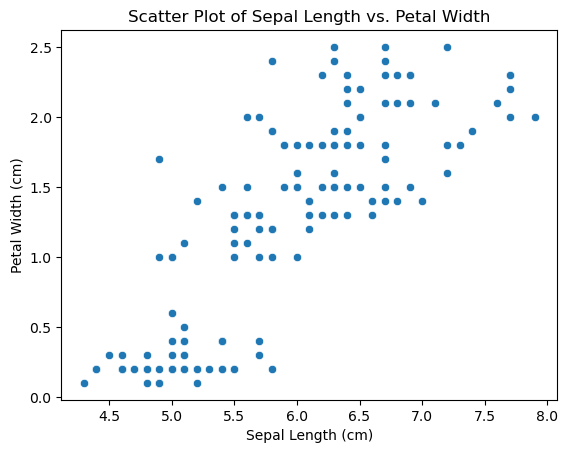

In [35]:

# Create a scatter plot
sns.scatterplot(x=sepal_length, y=petal_width)
plt.title('Scatter Plot of Sepal Length vs. Petal Width')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.show()


### Sepal Length vs Petal Width

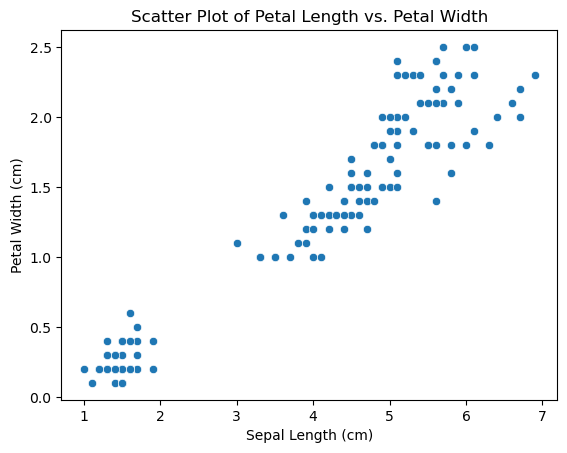

In [36]:

sns.scatterplot(x=petal_length, y=petal_width)
plt.title('Scatter Plot of Petal Length vs. Petal Width')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.show()


## Creating The Multiple Linear Regression Model

In [37]:
X = iris[['SepalLengthCm', 'PetalLengthCm']].values
y = iris['PetalWidthCm'].values

with pm.Model() as linear_model:

    beta0 = pm.Normal('beta0', mu=0, sd=10)
    beta1 = pm.Normal('beta1', mu=0, sd=10)
    beta2 = pm.Normal('beta2', mu=0, sd=10)
    
    sigma = pm.HalfNormal('sigma', sd=1)
    
    # Linear regression equation
    mu = beta0 + beta1 * X[:, 0] + beta2 * X[:, 1]
    
    likelihood = pm.Normal('y', mu=mu, sd=sigma, observed=y)
    
with linear_model:
    trace = pm.sample(2000, tune=1000, cores=2)



c:\Users\ahmad\anaconda3\envs\pm3bap\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, beta2, beta1, beta0]


C:\Users\ahmad\AppData\Local\Temp\ipykernel_4556\611152323.py:1: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  pm.traceplot(trace)


array([[<Axes: title={'center': 'beta0'}>,
        <Axes: title={'center': 'beta0'}>],
       [<Axes: title={'center': 'beta1'}>,
        <Axes: title={'center': 'beta1'}>],
       [<Axes: title={'center': 'beta2'}>,
        <Axes: title={'center': 'beta2'}>],
       [<Axes: title={'center': 'sigma'}>,
        <Axes: title={'center': 'sigma'}>]], dtype=object)

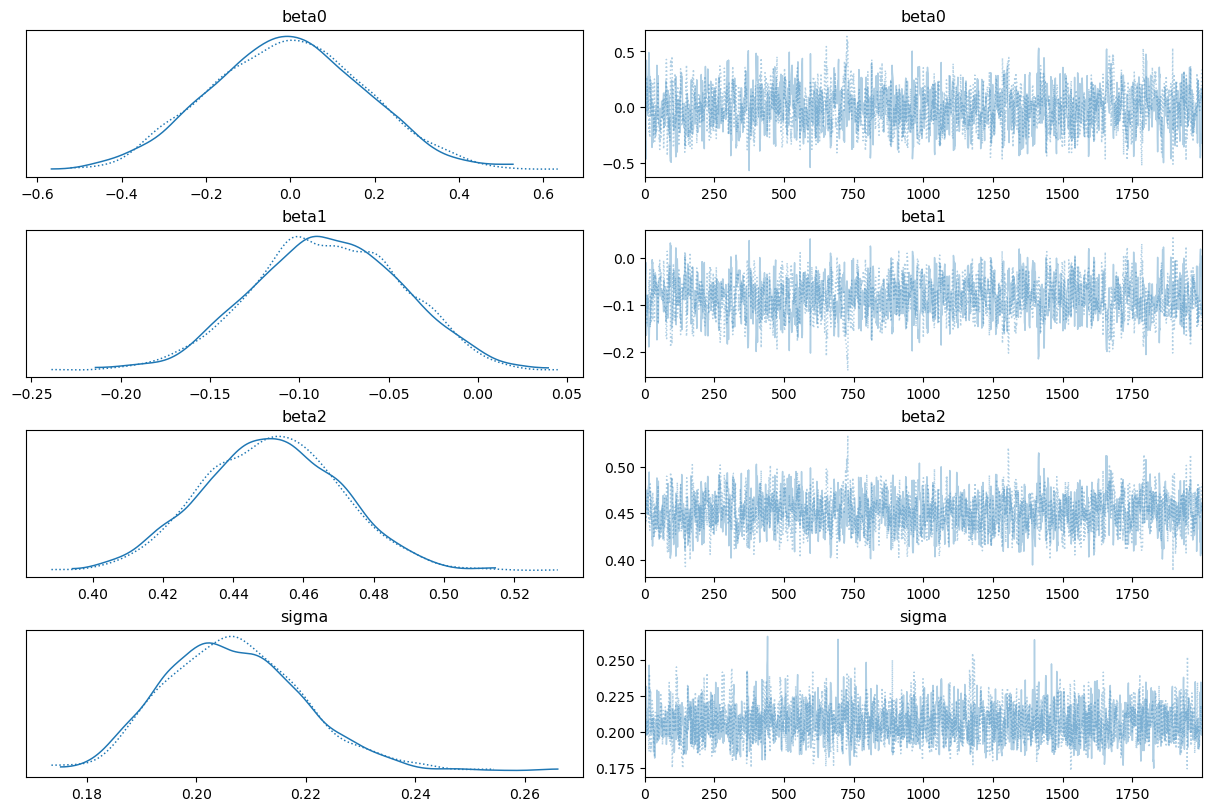

In [ ]:
pm.traceplot(trace)



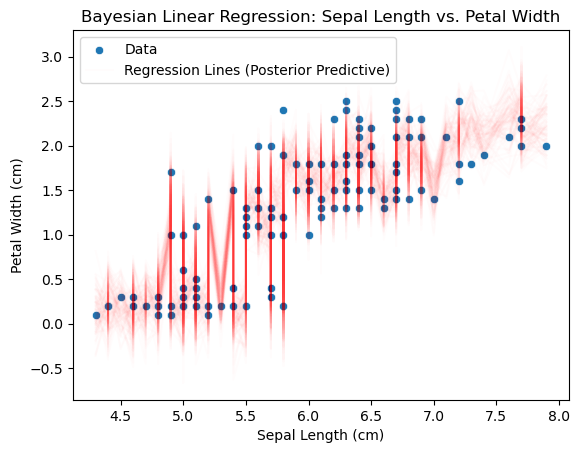

In [ ]:
plt.figure()
sns.scatterplot(x=iris['SepalLengthCm'], y=iris['PetalWidthCm'], label="Data")

# Display the regression lines using posterior samples
for i in range(len(posterior_samples['y'])):
    y_pred = posterior_samples['y'][i]
    x_sort_idx = np.argsort(X[:, 0])
    plt.plot(X[x_sort_idx, 0], y_pred[x_sort_idx], color='red', alpha=0.01)

plt.title('Bayesian Linear Regression: Sepal Length vs. Petal Width')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend(['Data', 'Regression Lines (Posterior Predictive)'])
plt.show()

c:\Users\ahmad\anaconda3\envs\pm3bap\lib\site-packages\arviz\data\io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([<Axes: title={'center': '94.0% HDI'}>], dtype=object)

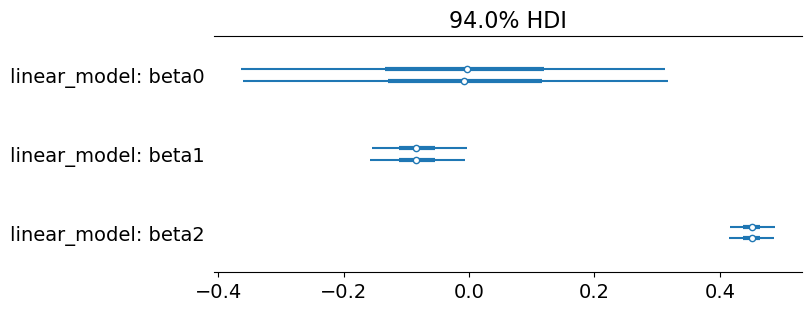

In [ ]:

az.plot_forest([trace],
 model_names=['linear_model'],
 var_names=['beta0', 'beta1', 'beta2'],
 combined=False, colors='cycle', figsize=(8, 3))